In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

%matplotlib inline

In [2]:
trash_haulers = pd.read_csv('../data/trash_hauler_report_with_lat_lng.csv')

In [3]:
trash_haulers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request Number    20226 non-null  int64  
 1   Date Opened       20226 non-null  object 
 2   Request           20226 non-null  object 
 3   Description       20195 non-null  object 
 4   Incident Address  20217 non-null  object 
 5   Zip Code          20151 non-null  float64
 6   Trash Hauler      19325 non-null  object 
 7   Trash Route       19279 non-null  object 
 8   Council District  20177 non-null  float64
 9   State Plan X      20198 non-null  float64
 10  State Plan Y      20198 non-null  float64
 11  LONGITUDE         20198 non-null  float64
 12  LATITUDE          20198 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 2.0+ MB


In [4]:
trash_haulers.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,686779.478089,-86.815392,36.217292
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565,-86.838103,36.213470
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571,-86.885562,36.142923
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923,-86.789170,36.212652
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066,-86.874995,36.154861


In [5]:
trash_haulers.tail()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144,-86.633970,36.069130
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.749711e+06,669201.601569,-86.741242,36.169482
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809,-86.671647,36.185643
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187,-86.620025,36.054637
20225,267137,11/01/19,Trash - Curbside/Alley Missed Pickup,possibly others missed as well,"604 Somerset Ct, Nashville, TN 37217, United S...",37217.0,RED RIVER,2505,29.0,1.781360e+06,637742.006846,-86.633331,36.083675


In [6]:
trash_haulers.columns

Index(['Request Number', 'Date Opened', 'Request ', 'Description',
       'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route',
       'Council District', 'State Plan X', 'State Plan Y', 'LONGITUDE',
       'LATITUDE'],
      dtype='object')

In [7]:
trash_haulers = trash_haulers.rename(columns={'Request ': 'Request'})

In [8]:
trash_haulers = trash_haulers.rename(columns = {'Request Number' : 'Request_Number', 'Date Opened' : 'Date_Opened', 'Incident Address' : 'Incident_Address', 'Zip Code' : 'Zip_Code', 'Trash Hauler' : 'Trash_Hauler', 'Trash Route' : 'Trash_Route', 'Council District' : 'Council_District'})
trash_haulers

,Request_Number,Date_Opened,Request,Description,Incident_Address,Zip_Code,Trash_Hauler,Trash_Route,Council_District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,686779.478089,-86.815392,36.217292
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565,-86.838103,36.213470
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571,-86.885562,36.142923
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923,-86.789170,36.212652
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066,-86.874995,36.154861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144,-86.633970,36.069130
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.749711e+06,669201.601569,-86.741242,36.169482
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809,-86.671647,36.185643
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187,-86.620025,36.054637


In [9]:
trash_haulers['Request'].value_counts()

Request
Trash - Curbside/Alley Missed Pickup    15028
Trash - Backdoor                         2629
Trash Collection Complaint               2312
Damage to Property                        257
Name: count, dtype: int64

In [10]:
trash_haulers['Trash_Hauler'] = trash_haulers['Trash_Hauler'].str.upper()

In [11]:
trash_haulers['Trash_Hauler'].value_counts()

Trash_Hauler
RED RIVER    14395
METRO         3580
WASTE IND     1350
Name: count, dtype: int64

In [12]:
trash_haulers['Trash_Route'].value_counts()

Trash_Route
4504     359
3302     310
1303     286
1301     275
4404     274
        ... 
4201S      3
3303S      2
1502S      2
2505S      2
2201S      1
Name: count, Length: 173, dtype: int64

In [13]:
trash_haulers['Description'].value_counts().head(50)

Description
miss                                      899
Missed.                                   602
missed                                    335
1 cart                                    325
cart still out                            314
MISSED                                    178
missed pick up                            171
Missed- trash                             142
Missed trash                              138
backdoor miss                             128
still out                                 124
Missed                                    120
missed pickup                             118
cust says missed                          104
BACKDOOR MISS                              86
missed the street                          79
missed again                               78
cust says missed pickup                    68
this street missed                         58
MISSED ENTIRE STREET                       52
entire street missed                       51
get                   

In [14]:
trash_haulers['Zip_Code'].value_counts()

Zip_Code
37013.0    2278
37211.0    2248
37205.0    1491
37209.0    1411
37215.0    1404
37207.0    1300
37115.0    1266
37206.0    1217
37208.0    1039
37214.0    1004
37218.0     983
37216.0     841
37217.0     832
37204.0     635
37212.0     601
37210.0     550
37203.0     394
37220.0     289
37027.0     168
37189.0      60
37221.0      48
37219.0      42
37201.0      35
37076.0       5
37138.0       5
37086.0       3
37213.0       1
37228.0       1
Name: count, dtype: int64

In [15]:
trash_haulers = trash_haulers.drop(columns = ['State Plan X', 'State Plan Y'])
trash_haulers

,Request_Number,Date_Opened,Request,Description,Incident_Address,Zip_Code,Trash_Hauler,Trash_Route,Council_District,LONGITUDE,LATITUDE
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,-86.815392,36.217292
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,-86.838103,36.213470
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,-86.885562,36.142923
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,-86.789170,36.212652
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,-86.874995,36.154861
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,-86.633970,36.069130
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,-86.741242,36.169482
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,-86.671647,36.185643
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,-86.620025,36.054637


In [16]:
trash_haulers.dtypes

Request_Number        int64
Date_Opened          object
Request              object
Description          object
Incident_Address     object
Zip_Code            float64
Trash_Hauler         object
Trash_Route          object
Council_District    float64
LONGITUDE           float64
LATITUDE            float64
dtype: object

In [17]:
trash_haulers = trash_haulers.fillna(0)

In [18]:
trash_haulers['Zip_Code'] = trash_haulers.Zip_Code.astype(int)

In [19]:
trash_haulers['Council_District'] = trash_haulers.Council_District.astype(int)

In [20]:
trash_haulers.head()

,Request_Number,Date_Opened,Request,Description,Incident_Address,Zip_Code,Trash_Hauler,Trash_Route,Council_District,LONGITUDE,LATITUDE
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207,RED RIVER,3205,2,-86.815392,36.217292
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1,-86.838103,36.213470
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20,-86.885562,36.142923
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207,WASTE IND,2206,2,-86.789170,36.212652
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209,RED RIVER,4203,20,-86.874995,36.154861


In [21]:
trash_haulers['Date_Opened'].value_counts().head()

Date_Opened
08/02/19    252
10/18/19    189
10/17/19    181
08/16/19    176
10/16/19    166
Name: count, dtype: int64

In [22]:
zipcodes = gpd.read_file('../projects/geospatial-AndrewR321/data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head()

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [23]:
zipcodes.shape

(56, 6)

In [24]:
trash_haulers['Request'].value_counts()

Request
Trash - Curbside/Alley Missed Pickup    15028
Trash - Backdoor                         2629
Trash Collection Complaint               2312
Damage to Property                        257
Name: count, dtype: int64

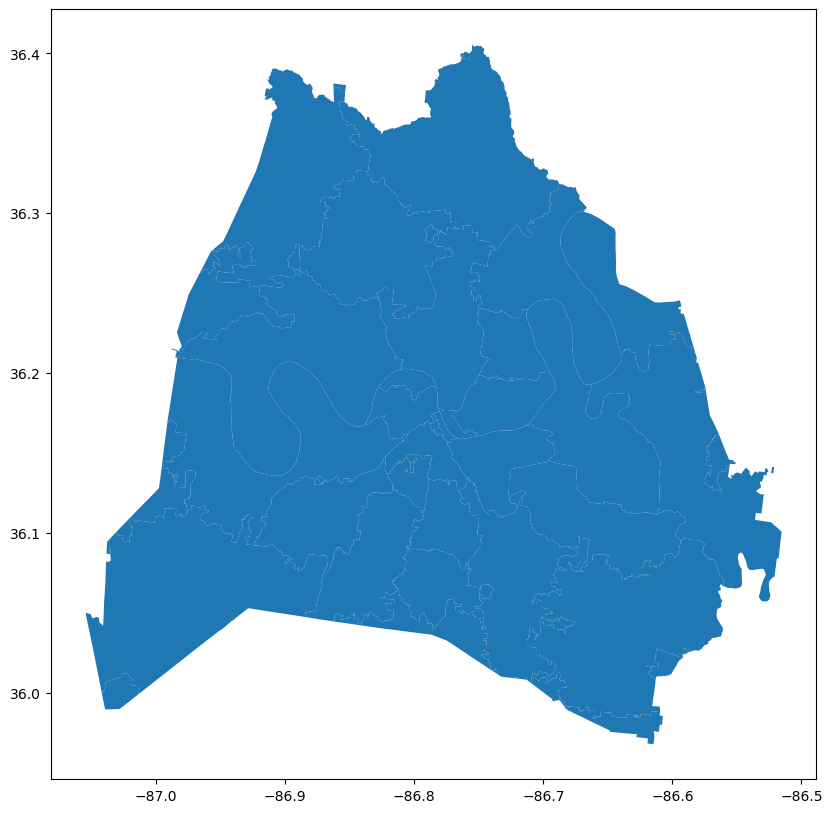

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
zipcodes.plot(ax = ax);

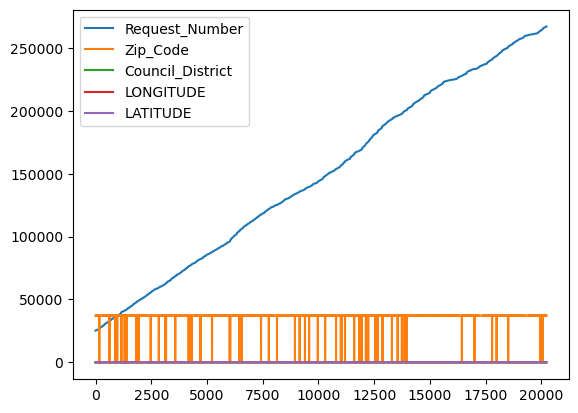

In [26]:
trash_haulers.plot(column = 'Trash_Hauler');

In [27]:
trash_haulers.columns

Index(['Request_Number', 'Date_Opened', 'Request', 'Description',
       'Incident_Address', 'Zip_Code', 'Trash_Hauler', 'Trash_Route',
       'Council_District', 'LONGITUDE', 'LATITUDE'],
      dtype='object')

In [28]:
address = trash_haulers[['Incident_Address', 'Zip_Code', 'LONGITUDE', 'LATITUDE']]
address.head()

,Incident_Address,Zip_Code,LONGITUDE,LATITUDE
0,3817 Crouch Dr,37207,-86.815392,36.217292
1,4028 Clarksville Pike,37218,-86.838103,36.213470
2,6528 Thunderbird Dr,37209,-86.885562,36.142923
3,2603 old matthews rd,37207,-86.789170,36.212652
4,604 croley dr,37209,-86.874995,36.154861


In [29]:
###address = address.loc[~((address['LONGITUDE'] == 0) | (address['LATITUDE'] == 0))]
###address.shape

In [30]:
address = address.loc[((address['Zip_Code'] == 0) | (address['LONGITUDE'] < -86.5) | (address['LATITUDE'] > 35.9))]

In [31]:
address_geo = gpd.GeoDataFrame(address,
                               crs = zipcodes.crs,
                               geometry = gpd.points_from_xy(address.LONGITUDE, address.LATITUDE))

In [32]:
type(address_geo)

geopandas.geodataframe.GeoDataFrame

In [33]:
long0 = address_geo.query('LONGITUDE > -1.000000')
long0.shape

(32, 5)

In [34]:
address_geo.sort_values(by=['LONGITUDE'], ascending= [False]).head(40)

,Incident_Address,Zip_Code,LONGITUDE,LATITUDE,geometry
13862,"Granbery Park Dr, Nashville, TN 37027, United ...",0,0.000000,0.000000,POINT (0.00000 0.00000)
12550,27th Ave. S,0,0.000000,0.000000,POINT (0.00000 0.00000)
169,4203 Kennedy Ave,0,0.000000,0.000000,POINT (0.00000 0.00000)
625,0,0,0.000000,0.000000,POINT (0.00000 0.00000)
1945,4928 Jonquil Dr,0,0.000000,0.000000,POINT (0.00000 0.00000)
19946,"788 Lebanon Pike, Nashville, TN 37210, United ...",0,0.000000,0.000000,POINT (0.00000 0.00000)
1154,0,0,0.000000,0.000000,POINT (0.00000 0.00000)
1148,715 W Meade Dr,0,0.000000,0.000000,POINT (0.00000 0.00000)
3576,1911 haynes st,0,0.000000,0.000000,POINT (0.00000 0.00000)
1851,0,0,0.000000,0.000000,POINT (0.00000 0.00000)


In [35]:
nozero = address_geo[address_geo['Zip_Code'] !=0]

In [41]:
nozero.shape

(20144, 5)

<Axes: >

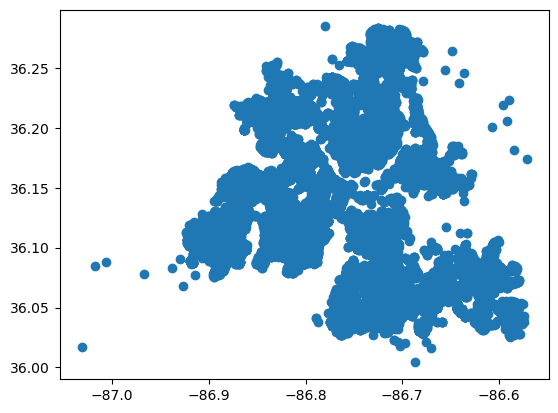

In [37]:
nozero.plot()

In [38]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [43]:
address_by_zip = gpd.sjoin(nozero, zipcodes, predicate = 'within')
address_by_zip.head()

,Incident_Address,Zip_Code,LONGITUDE,LATITUDE,geometry,index_right,zip,po_name
0,3817 Crouch Dr,37207,-86.815392,36.217292,POINT (-86.81539 36.21729),42,37207,NASHVILLE
1,4028 Clarksville Pike,37218,-86.838103,36.213470,POINT (-86.83810 36.21347),27,37218,NASHVILLE
2,6528 Thunderbird Dr,37209,-86.885562,36.142923,POINT (-86.88556 36.14292),12,37209,NASHVILLE
3,2603 old matthews rd,37207,-86.789170,36.212652,POINT (-86.78917 36.21265),42,37207,NASHVILLE
4,604 croley dr,37209,-86.874995,36.154861,POINT (-86.87499 36.15486),12,37209,NASHVILLE


In [49]:
address_by_zip.dtypes

Incident_Address      object
Zip_Code               int32
LONGITUDE            float64
LATITUDE             float64
geometry            geometry
index_right            int64
zip                   object
po_name               object
dtype: object

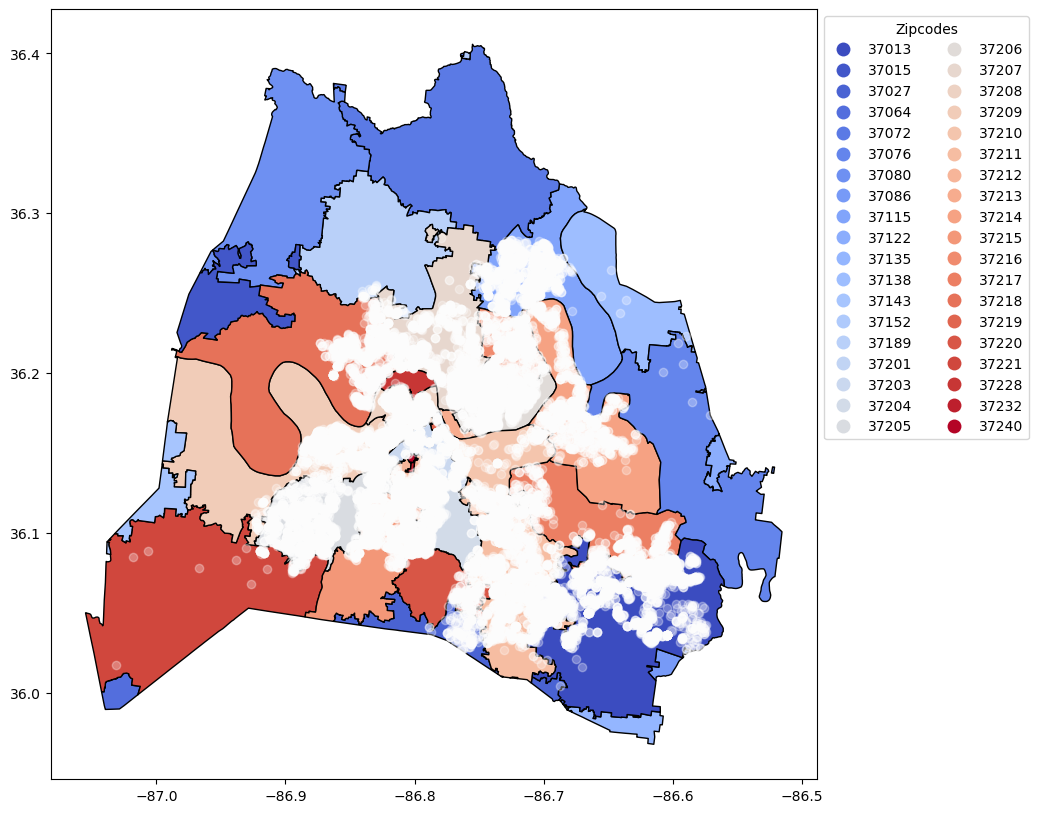

In [64]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 'bbox_to_anchor': (1,1),'ncol':2}
ax = zipcodes.plot(column = 'zip', figsize = (10,10), edgecolor = 'black', legend = True, legend_kwds = leg_kwds, cmap='coolwarm')
nozero.plot(ax =ax, color = 'white', alpha = .3);
plt.show();

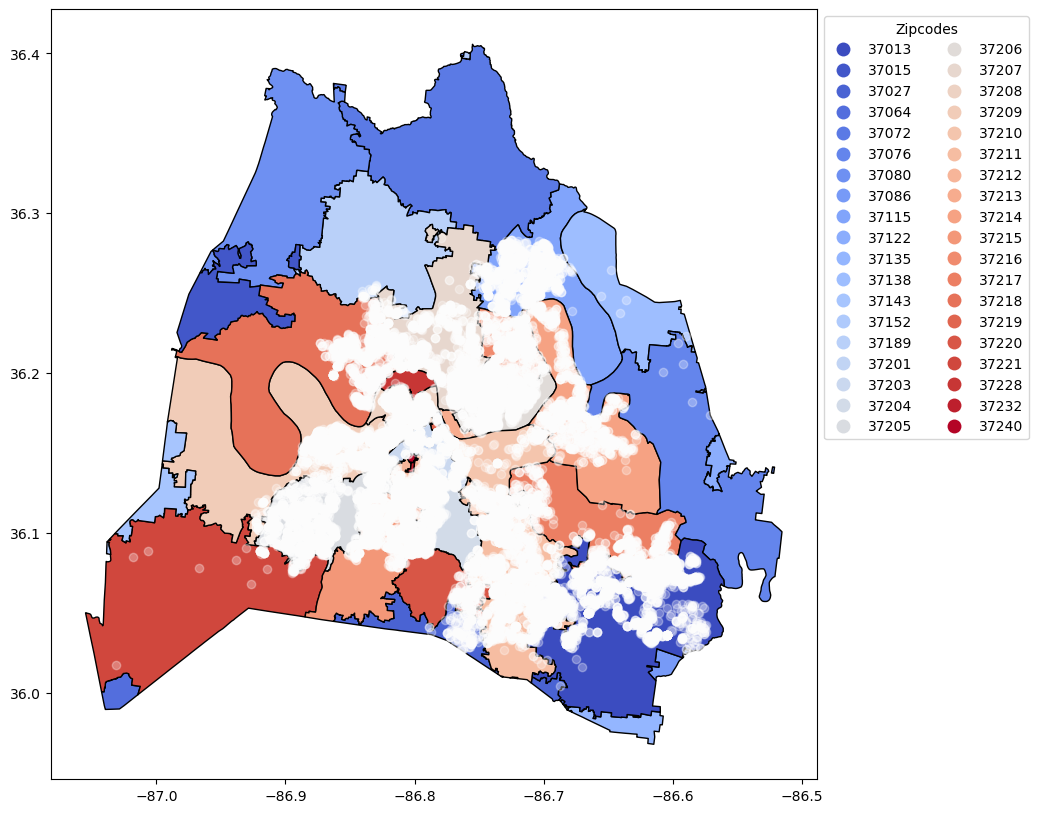

In [64]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 'bbox_to_anchor': (1,1),'ncol':2}
ax = zipcodes.plot(column = 'zip', figsize = (10,10), edgecolor = 'black', legend = True, legend_kwds = leg_kwds, cmap='coolwarm')
nozero.plot(ax =ax, column '', alpha = .3);
plt.show();